<a href="https://colab.research.google.com/github/tebufegha/SCRAPING/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Microsoft machine learning challenge (January 2019)
## Supervised learning/Classification



This project is organized into following parts:

- Introduction
- Exploration data analysis
- Data visualization
- Data preparation
- Building Machine Learning Model
- Evaluating the Model
- Improving the model
- Re-Evaluating the Model
- Prepare Test Data
- Load and Test the model on Test Data
- Conclusion

## Introduction 

### Challenge Overview

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. 

In this challenge, we will put into practice the key principles and techniques used into building  classification model.

The challenge requires the  interpretion of the requirements and necessary tasks to build, test, and optimize the model. After creating the model, we will use the provided test dataset to evaluate the model's performance.



### In this project, I will tackle following :

- Challenge 1: Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
- Challenge 2: Build a classification model to predict customer purchasing behavior(likelihood of buying or not buying a bike).




### Challenge Instructions

To complete this challenge we will:

- Use the Adventure Works Cycles customer data to create a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.
- Get the test data. This data includes customer features but does not include bike purchasing or average monthly spend values.
- Use the model to predict the corresponding test dataset.


### Datasets description
This data consists of three files, containing data that was collected on January 1st 1998.


AdvWorksCusts.csv
Customer demographic data consisting of the following fields:

- CustomerID (integer): A unique customer identifier.
- Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
- FirstName (string): The customer's first name.
- MiddleName (string): The customer's middle name.
- LastName (string): The customer's last name.
- Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
- AddressLine1 (string): The first line of the customer's home address.
- AddressLine2 (string): The second line of the customer's home address.
- City (string): The city where the customer lives.
- StateProvince (string): The state or province where the customer lives.
- CountryRegion (string): The country or region where the customer lives.
- PostalCode (string): The postal code for the customer's address.
- PhoneNumber (string): The customer's telephone number.
- BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
- Education (string): The maximum level of education achieved by the customer:
- Partial High School
- High School
- Partial College
- Bachelors
- Graduate Degree
- Occupation (string): The type of job in which the customer is employed:
- Manual
- Skilled Manual
- Clerical
- Management
- Professional
- Gender (string): The customer's gender (for example, M for male, F for female, etc.)
- MaritalStatus (string): Whether the customer is married (M) or single (S).
- HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
- NumberCarsOwned (integer): The number of cars owned by the customer.
- NumberChildrenAtHome (integer): The number of children the customer has who live at home.
- TotalChildren (integer): The total number of children the customer has.
- YearlyIncome (decimal): The annual income of the customer.


 AW_AveMonthSpend.csv
Sales data for existing customers, consisting of the following fields:

- CustomerID (integer): The unique identifier for the customer.
- AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

AW_BikeBuyer.csv
Sales data for existing customers, consisting of the following fields:

- CustomerID (integer): The unique identifier for the customer.
- BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

In [10]:
#Let us start by importing libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
!git clone https://github.com/cesarniyo/Machine-Learning-CLASSIFICATION.git
!mkdir data
!cp /content/Machine-Learning-CLASSIFICATION/Classification/*.csv ./data/
! rm -R Machine-Learning-CLASSIFICATION/

Cloning into 'Machine-Learning-CLASSIFICATION'...
remote: Enumerating objects: 14, done.
remote: Total 14 (delta 0), reused 0 (delta 0), pack-reused 14
Unpacking objects: 100% (14/14), done.
mkdir: cannot create directory ‘data’: File exists


In [13]:
#Load training data
Features = pd.read_csv('./data/AdvWorksCusts.csv')
RLabels = pd.read_csv('./data/AW_AveMonthSpend.csv')
CLabels = pd.read_csv('./data/AW_BikeBuyer.csv')

#concatinate all data into one table
df=pd.concat([Features,RLabels['AveMonthSpend'],CLabels['BikeBuyer']], axis=1, sort=False)

## Exploration Data Analysis (EDA)

### Data exploration

In [14]:
#Take a look on the shape of data
df.shape

(16519, 25)

In [15]:
#Displaying the head of the dataset
df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1


In [16]:
#Features names exploration

df.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [17]:
#Get Information on feature type( numbers or strings)
df.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [18]:
# info() command informs us on number of entries we got, also the type( int or strings) of each feature in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16519 non-null  int64 
 1   Title                 88 non-null     object
 2   FirstName             16519 non-null  object
 3   MiddleName            9534 non-null   object
 4   LastName              16519 non-null  object
 5   Suffix                2 non-null      object
 6   AddressLine1          16519 non-null  object
 7   AddressLine2          276 non-null    object
 8   City                  16519 non-null  object
 9   StateProvinceName     16519 non-null  object
 10  CountryRegionName     16519 non-null  object
 11  PostalCode            16519 non-null  object
 12  PhoneNumber           16519 non-null  object
 13  BirthDate             16519 non-null  object
 14  Education             16519 non-null  object
 15  Occupation            16519 non-null

### Data cleaning

This process includes taskes like:

- recoding feature names if needed
- remove duplicates 
- dealing with missing values 
- dealing with outlier 
- drop colums and raws as needed

In [19]:
#We will use the following command to see if any duplicates 
print(df.shape)#displaying current shape
print(df.CustomerID.unique().shape)#counting each customer ID once

(16519, 25)
(16404,)


In [20]:
# Droping duplicates noticed in above code
df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)# may use keep= 'first' or 'last'
print(df.shape)
print(df.CustomerID.unique().shape)

(16404, 25)
(16404,)


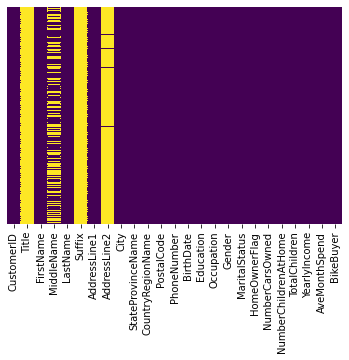

In [21]:
#Dealing with missing value
#(Features.astype(np.object) == 'NaN').any()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')# Yellow section indicate missing data 

In [22]:
#dropping columns with missing values
df.drop(['Title','MiddleName','Suffix','AddressLine2'],axis=1,inplace=True)

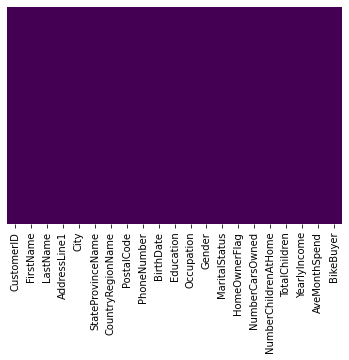

In [23]:
#double checking on the rest of data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')#No more missing data

### Data Statistics summary 

Statistical Overview will brief us on  things like : 

- count
- mean,
- meadian
- mode
- standard deviation,
- min 
- max
- range



In [24]:
#A statistic summary on each feature
df.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [25]:
# Average Monthly spending count
df['AveMonthSpend'].count()

16404

In [26]:
#The minimum average monthly spending
df['AveMonthSpend'].min()

22

In [27]:
#The max average monthly spending
df['AveMonthSpend'].max()

176

In [28]:
#The  average of 'AveMonthSpend' 
df['AveMonthSpend'].mean()

72.39100219458669

In [29]:
#The median of 'AveMonthSpend'
df['AveMonthSpend'].median()

68.0

In [30]:
#standard deviation
df['AveMonthSpend'].std()

27.26992129964956

In [31]:
#Unique categories in Bikebuyer column 
df['BikeBuyer'].unique()

array([0, 1])

In [32]:
#Bikebuyer  Distribution 
#0: did not buy   
#1:Bought the bike
    
df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

In [33]:
#Yearly income grouped by Occupation categories
df[['Occupation', 'YearlyIncome']].groupby('Occupation').median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [34]:
#Creating a new Age column (Feature computed based on difference between 1998 and each customer birthday)
df['Age']=[(1998-int(x[0:4]))for x in df['BirthDate']]

In [35]:
#View on Age column:
df['Age'].head(5)

0    32
1    33
2    33
3    30
4    30
Name: Age, dtype: int64

In [36]:
# have a look on the relation between 'Age' and 'AveMonthSpend'
df[['Age','AveMonthSpend']].head()

,Age,AveMonthSpend
0,32,89
1,33,117
2,33,123
3,30,50
4,30,95


In [37]:
#Checking on dataset entries by raw(bellow is customer number 1 entrie information)

#df.loc[0]
df.iloc[0:1]

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32


In [38]:
#Let us examine the Age and Yearly-income of the 15th customer:
df.loc[[15 ],['Age','YearlyIncome']]

,Age,YearlyIncome
15,19,40011


In [39]:
#The list of customers with Graduate degree
df[df['Education']=='Graduate Degree'].head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
49,11057,Carl,Andersen,6930 Lake Nadine Place,Lane Cove,New South Wales,Australia,1597,1 (11) 500 555-0181,1953-10-12,Graduate Degree,Management,M,M,1,2,0,2,119540,82,0,45
69,11079,Donald,Gonzalez,4236 Malibu Place,Geelong,Victoria,Australia,3220,1 (11) 500 555-0137,1959-03-11,Graduate Degree,Management,M,S,1,2,0,0,172444,87,0,39
70,11080,Damien,Chander,9941 Stonehedge Dr.,Perth,South Australia,Australia,6006,1 (11) 500 555-0111,1959-07-17,Graduate Degree,Management,M,M,1,2,0,0,181590,92,1,39
72,11082,Angela,Butler,6040 Listing Ct,Fremont,California,United States,94536,579-555-0195,1966-08-04,Graduate Degree,Management,F,S,0,3,1,1,149717,62,1,32
73,11083,Alyssa,Cox,867 La Orinda Place,Lincoln Acres,California,United States,91950,561-555-0140,1966-03-15,Graduate Degree,Management,F,M,1,3,1,1,163913,68,1,32


In [40]:
#Age of the youngest customer with a Graduate degree
df[df['Education']=='Graduate Degree']['Age'].min()

20

In [41]:
#Age of the eldest customer with a Graduate degree
df[df['Education']=='Graduate Degree']['Age'].max()

76

In [42]:
#Names of customer with 40 years with yearly income > 100000
df[(df['Age']==40)& (Features['YearlyIncome']>=100000)]['FirstName'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


213    Clarence
214       Mayra
215      Latoya
216        Anne
491       Logan
Name: FirstName, dtype: object

In [43]:
#costomer count by gender
df['count'] = 1
df[['Gender', 'count']].groupby('Gender').count()

,count
Gender,
F,8114
M,8290


In [44]:
#Education and Occupation count by respective categories
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())

cat_cols = ['Education', 'Occupation']
count_unique(df, cat_cols)


For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64


In [45]:
#Examin class imbalance
#0: did not buy   
#1:Bought the bike

df['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

## Data visualization 

Before creating analytical models, we must develop an understanding of the properties and relationships in a dataset. There are two goals for data exploration and visualization. First to understand the relationships between the data columns. Second to identify features that may be useful for predicting  in machine learning projects. Additionally, redundant, collinear features can be identified so they can be eliminated or otherwise dealt with.


For classification problems we are looking for features that help predict the label (category). Thus visually exploring data to determine which features may be useful in predicting customer behavior (buying or not buying a bicycle).


following tool may be used depending on what type of visualization needed:

- 1D plots (bar ,hist+( kde,rug) ) to visualize distribution and frequency  
- 2D plots (scatter,jointplot,violinplot) to visualize relationship between 2 features
- 2D+ plots (regplot= scatter + colors + size) to visualize relationship between more than 2 features
- Multiple axes (pairplot)to visualize relationship between more than 2 features
- Conditioned (FaceGrid)to visualize relationship between more than 2 features

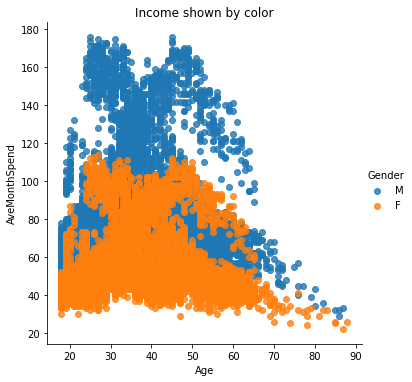

In [46]:
# customers AveMonthSpend by Age and Gender(male are spanding more than female)
def plot_Features(df, col1, col2):
    sns.lmplot(x = col1, y = col2, 
               data = df, 
               hue = "Gender", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Income shown by color')
    plt.show()
    
plot_Features(df,'Age', 'AveMonthSpend')
#plot_Features(Features, 'Education', 'Age')

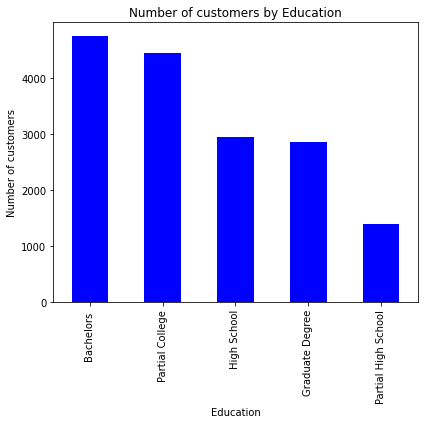

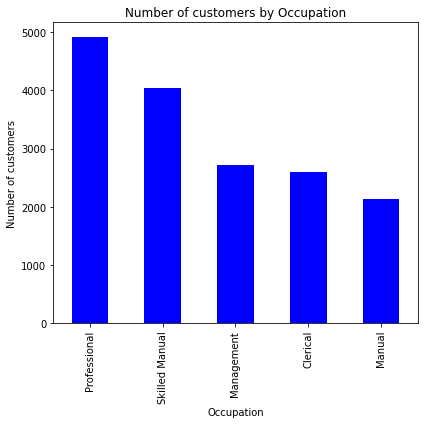

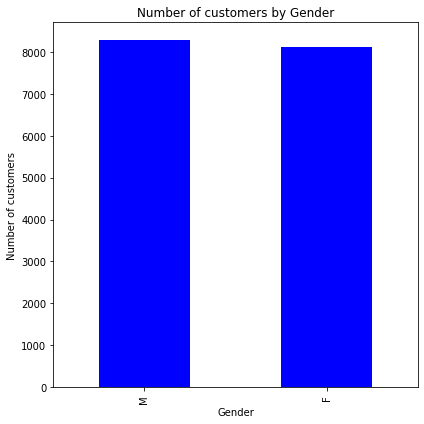

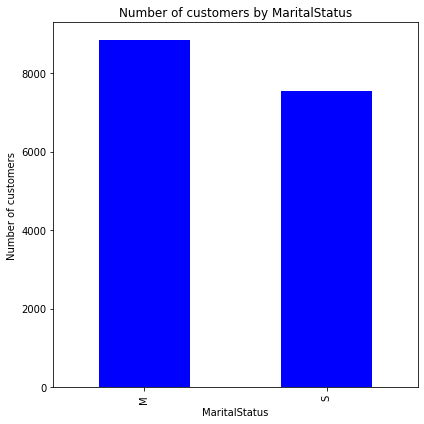

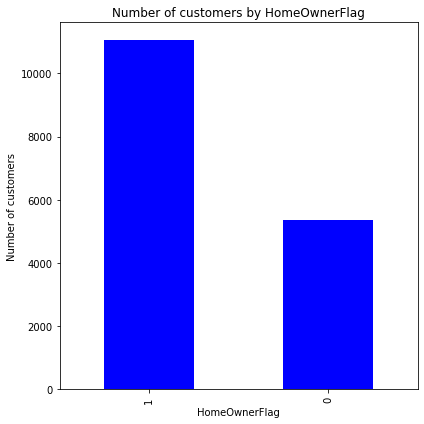

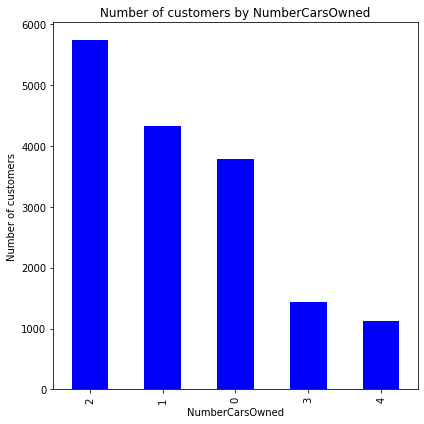

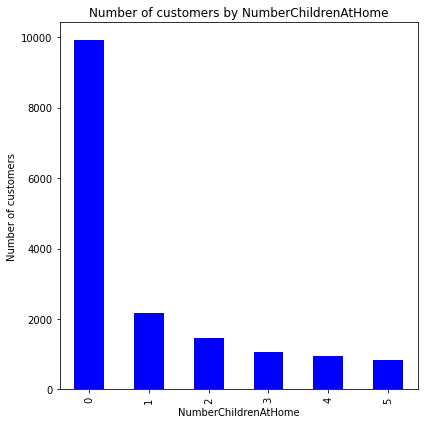

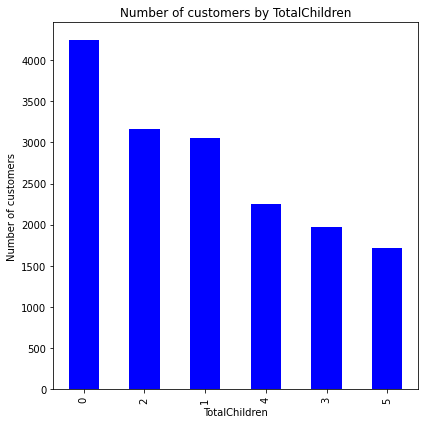

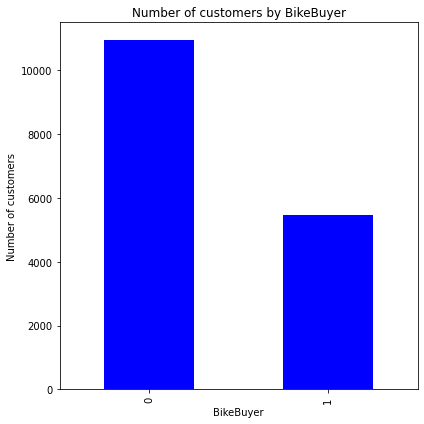

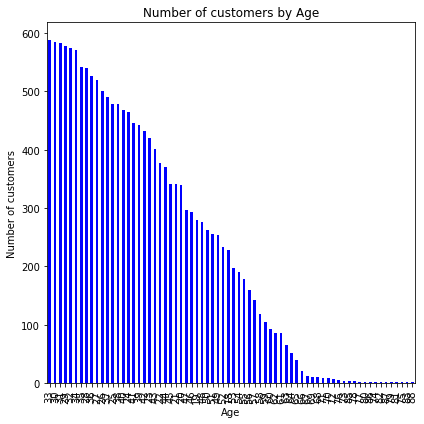

In [47]:
#Number of customers by category(education wise, more of customers are bachelor's degree holders )
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts()# find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.tight_layout()
        plt.show()

plot_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'BikeBuyer', 'Age']
plot_bars(df, plot_cols)    

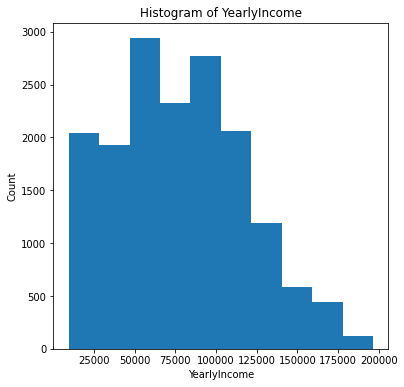

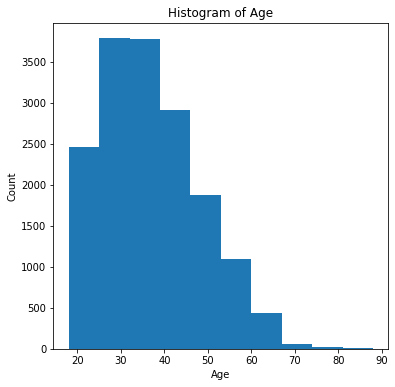

In [48]:
#Histogram of YearlyIncome and Age
def plot_histogram(df, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        df[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Count')# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome', 'Age']    
plot_histogram(df, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


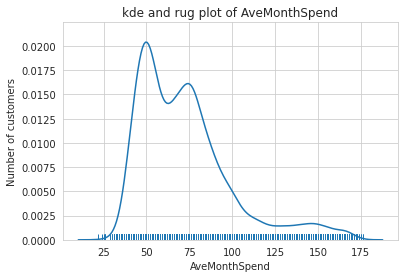

In [49]:
#kde and rug plots showing the relationship between number of customers and AveMonthSpend
def plot_density_hist(df, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=True, hist = hist)
        plt.title('kde and rug plot of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of customers')# Set text for y axis
        plt.show()
        
num_cols = ['AveMonthSpend']         
plot_density_hist(df, num_cols)  

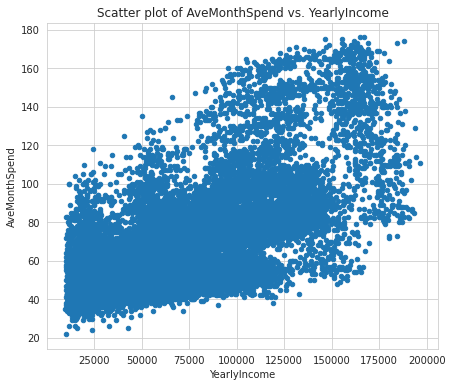

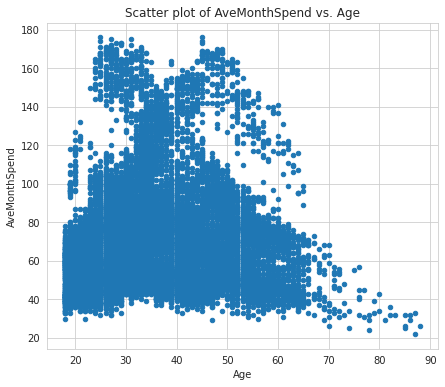

In [50]:
def plot_scatter(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Gives the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome','Age']
plot_scatter(df, num_cols)

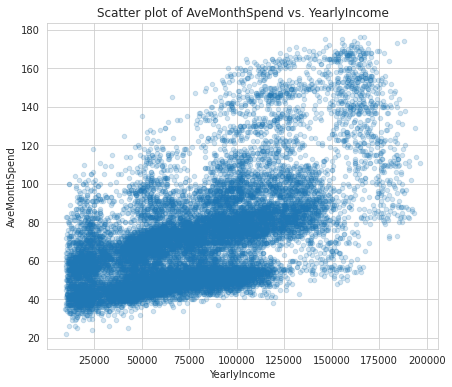

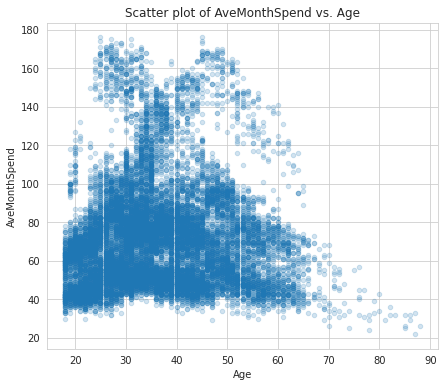

In [51]:
def plot_scatter_t(df, cols, col_y = 'AveMonthSpend', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Gives the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ['YearlyIncome','Age']
plot_scatter_t(df, num_cols, alpha = 0.2)       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


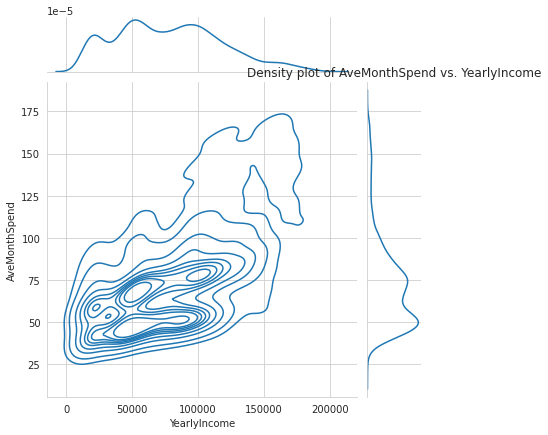

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


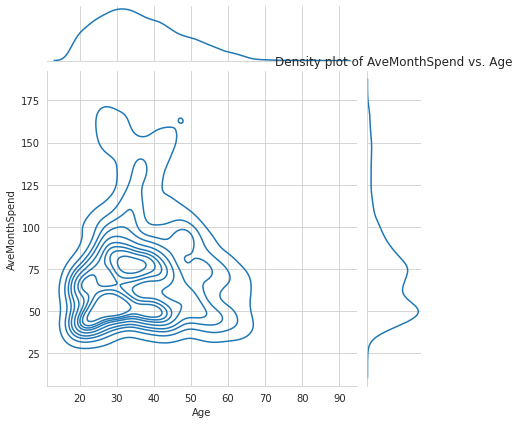

In [52]:
def plot_density_2d(df, cols, col_y = 'AveMonthSpend', kind ='kde'):#kind ='kde',kind = 'hex'
    for col in cols:
        sns.set_style("whitegrid")
        ax=sns.jointplot(col, col_y, data=df, kind=kind)
        plt.title('Density plot of ' + col_y + ' vs. ' + col) # Gives the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
num_cols = ['YearlyIncome','Age']
plot_density_2d(df, num_cols)    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


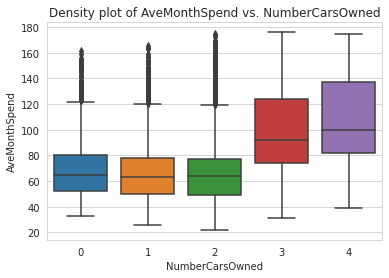

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


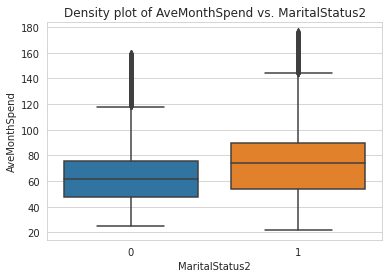

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


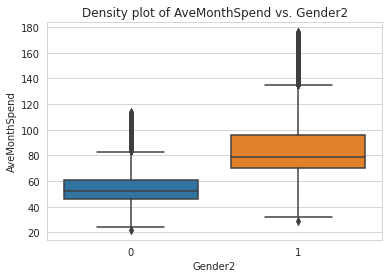

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


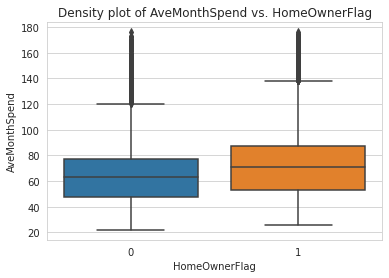

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


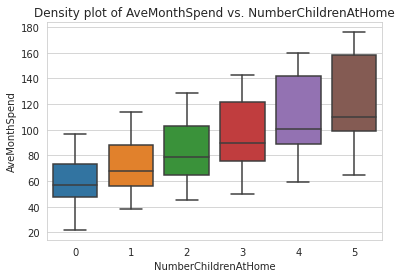

In [53]:
def plot_box(df, cols, col_y= 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.title('Density plot of ' + col_y + ' vs. ' + col) # Gives the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y,)# Set text for y axis
        plt.show()
        
#Creating new feature for visualization purpose
MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
df['Gender2']=Gender2['M']
df['MaritalStatus2']=MaritalStatus2['M']


num_cols = ['NumberCarsOwned','MaritalStatus2','Gender2','HomeOwnerFlag','NumberChildrenAtHome']#
plot_box(df, num_cols)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


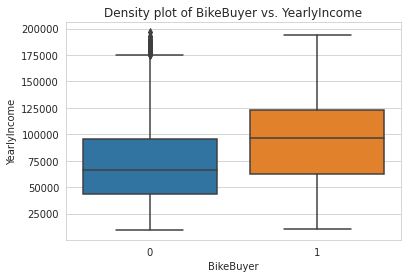

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


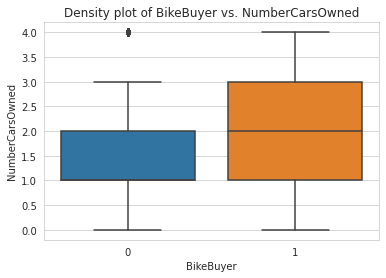

In [54]:
def plot_box(df, cols, col_x= 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.title('Density plot of ' + col_x + ' vs. ' + col) # Gives the plot a main title
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
#Next we represent Sex and Embarked columns with numbers instead
MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
df['Gender2']=Gender2['M']
df['MaritalStatus2']=MaritalStatus2['M']


num_cols = ['YearlyIncome','NumberCarsOwned']#['Occupation','Gender2','MaritalStatus2']
plot_box(df, num_cols)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


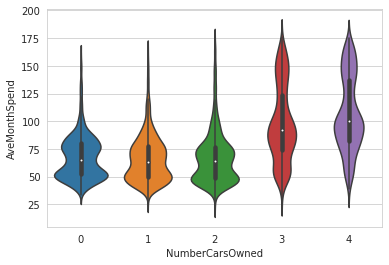

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


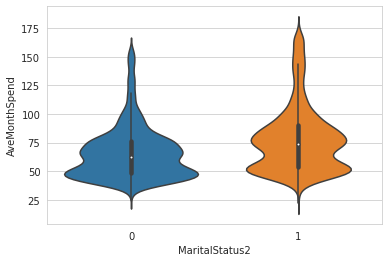

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


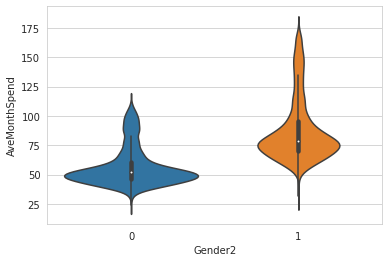

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


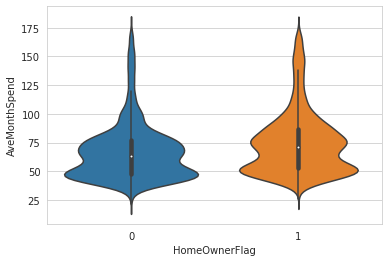

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


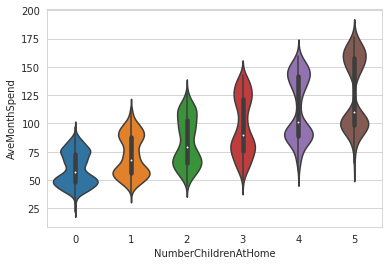

In [55]:
def plot_violin(df, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
num_cols = ['NumberCarsOwned','MaritalStatus2','Gender2','HomeOwnerFlag','NumberChildrenAtHome']
plot_violin(df, num_cols)

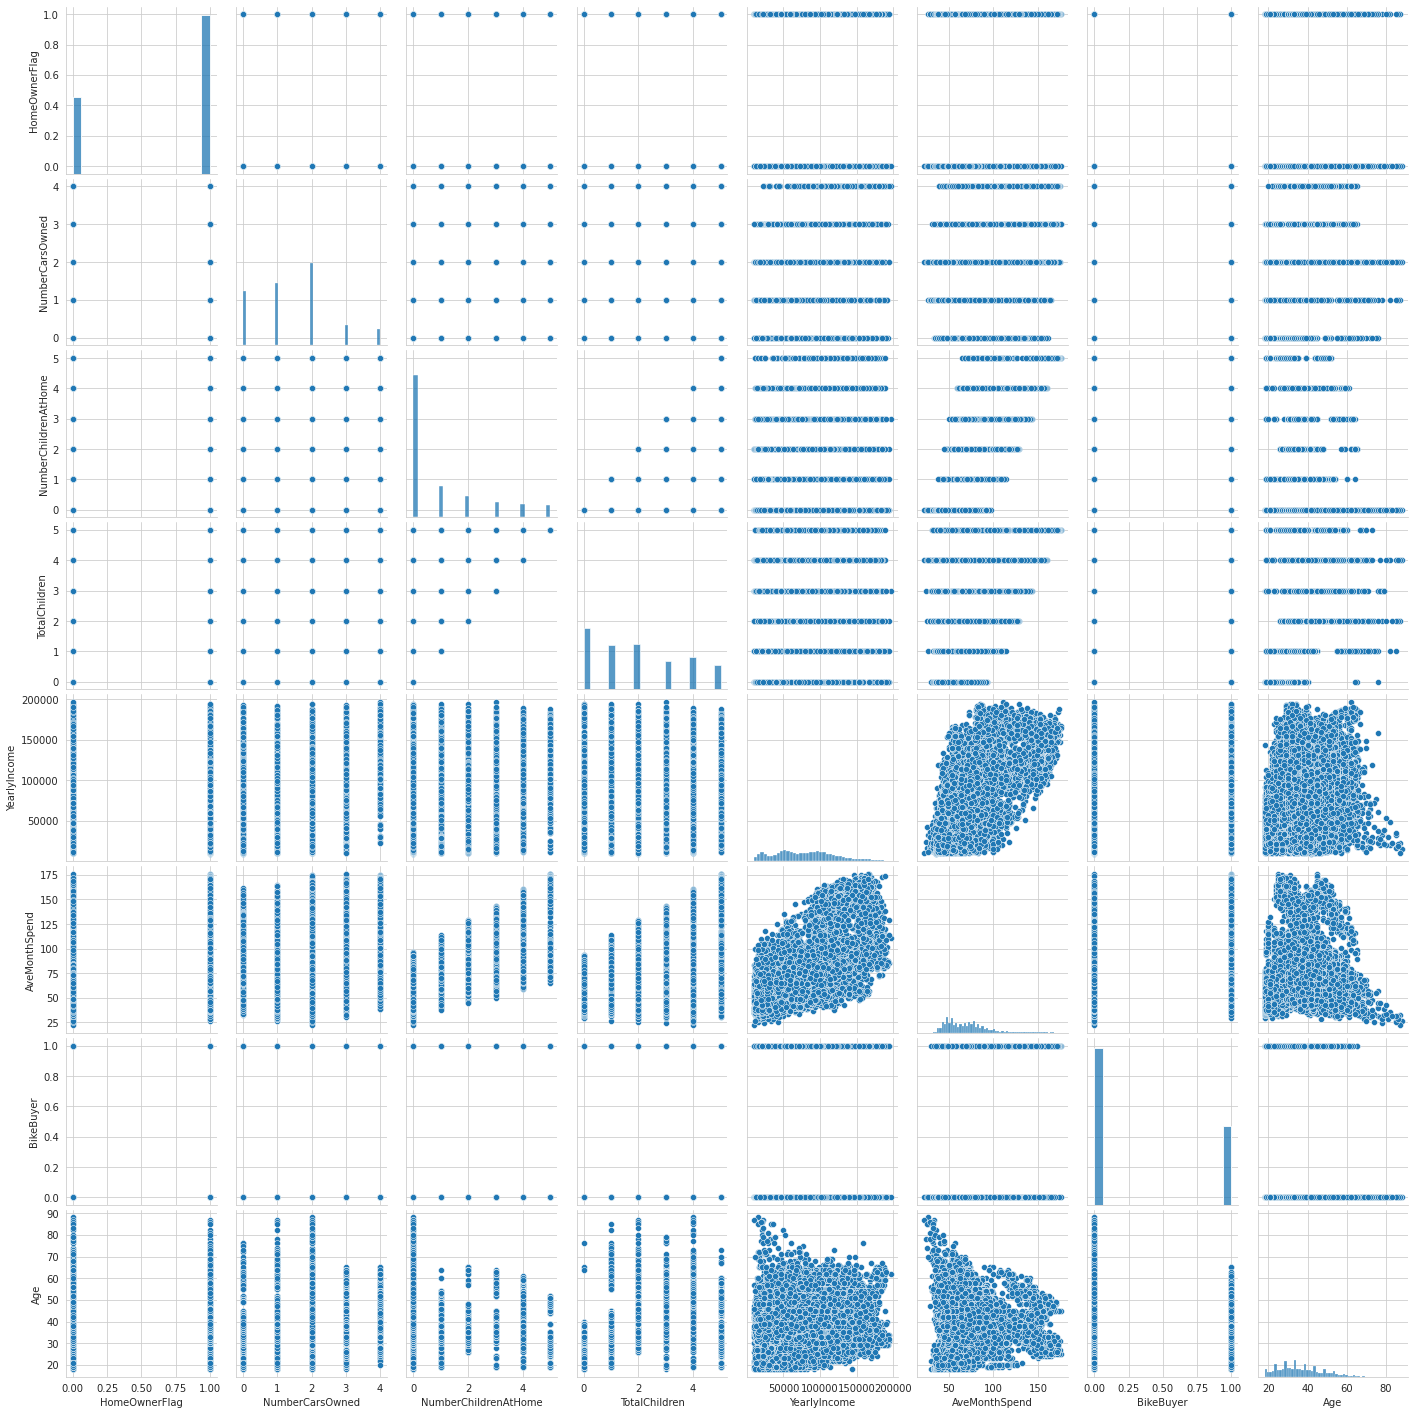

In [56]:
#Pairplot will allow us to chech the correlation between features, useful tool for feature selection
sns.pairplot(df[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age']])


#positive correlation desplayed between Yearly income and Average Monthly spending

'BikeBuyer'

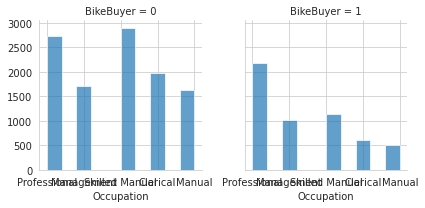

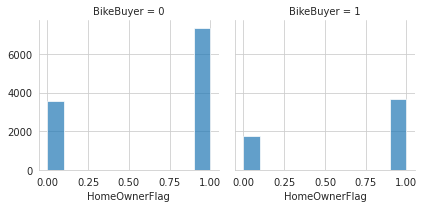

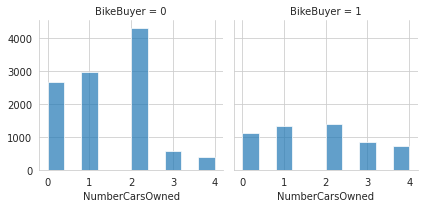

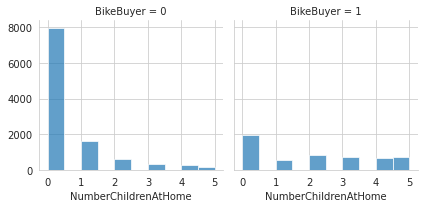

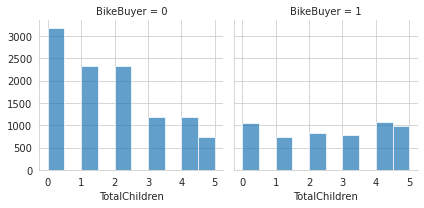

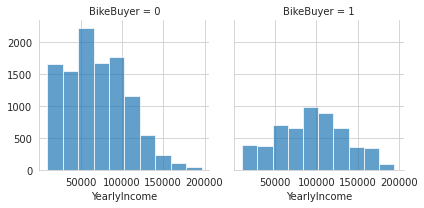

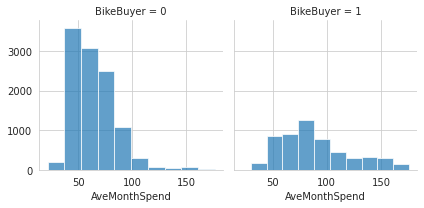

In [57]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ['Occupation','HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend']
cond_hists(df, plot_cols2, 'BikeBuyer')

## Data preparation

Data preparation process includes the following:

- feature selection
- feature eng
- Encoding categorical variables as binary dummy variables.
- Aggregating categories of certain categorical variables.
- Standardizing numeric variables
- Cross-varidation 
- scaling 
- splitting

In [58]:
#coding object feature to numerics

MaritalStatus2 = pd.get_dummies(df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(df['Gender'],drop_first=False)
Occupation2 = pd.get_dummies(df['Occupation'],drop_first=False)
Education2 = pd.get_dummies(df['Education'],drop_first=False)

In [59]:
#Next, we  concatinete the rest of our data with the new created columns
df = pd.concat([df,Occupation2,Education2],axis=1)
df.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,count,Gender2,MaritalStatus2,Clerical,Management,Manual,Professional,Skilled Manual,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,32,1,1,1,0,0,0,1,0,1,0,0,0,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,33,1,1,0,0,0,0,1,0,1,0,0,0,0
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,33,1,1,1,0,0,0,1,0,1,0,0,0,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,30,1,0,0,0,0,0,1,0,1,0,0,0,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,30,1,0,0,0,0,0,1,0,1,0,0,0,0


In [60]:
#Feature selection/ we drop features we do not need for traing our model

df.drop(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate','Occupation','Education','Gender','count', 'MaritalStatus','AveMonthSpend'],axis=1,inplace=True)
#count feature was created while counting customers by gender

In [61]:
#Cross-varidation

#Importing  tools to split out our data into traing and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('BikeBuyer',axis=1), 
                                                    df['BikeBuyer'], test_size=0.30, 
                                                    random_state=101)

In [62]:
#Standardizing numeric variables(turning features and labels to numpy arrays)

X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [63]:
#Data scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 



## Building Machine Learning Model

In [125]:
#Importing learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics

In [129]:
print(X_train.shape)

(11482, 18)


In [130]:
# Sport checking algorithms
models = []
models.append(('LOG', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier(max_depth=4)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM', SVC(kernel='linear')))
models.append(('ADABOOST', AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=600,learning_rate=1.5,algorithm="SAMME")))
models.append(('NN', MLPClassifier(activation='relu',solver='adam', alpha=0.05, hidden_layer_sizes=(150,),learning_rate='constant', random_state=1)))
models.append(('RF', RandomForestClassifier())) 
models.append(('XGB', XGBClassifier()))


In [131]:
# Training the algorithms on data
names = []
score = []

for name,model in models:
    model.fit(X_train,y_train)
    names.append(name)
    score.append(metrics.accuracy_score(y_test,model.predict(X_test)))#prediction %
    
    # save the trained model 
    from sklearn.externals import joblib
    filename = str(name)
    joblib.dump(model, filename)

In [132]:
#Predicting on test data using each build model
predictions = []
for name,model in models:
    pred = model.predict(X_test)
    predictions.append((name,pred))#model name,predicted label

## Evaluating the Model

for model performance evaluation we will use following metrics:

- confution matrix and classification report
- ROC and AUC

In [133]:
#importing the metric libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [134]:
#Printing the performance results of each model
#(confution matrix and classification report )

for (name,pred) in predictions:
    print()
    print()
    print('**********************',name,'************************')
    print()
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))




********************** LOG ************************

[[2922  316]
 [ 750  934]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3238
           1       0.75      0.55      0.64      1684

    accuracy                           0.78      4922
   macro avg       0.77      0.73      0.74      4922
weighted avg       0.78      0.78      0.77      4922



********************** CART ************************

[[2955  283]
 [ 833  851]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      3238
           1       0.75      0.51      0.60      1684

    accuracy                           0.77      4922
   macro avg       0.77      0.71      0.72      4922
weighted avg       0.77      0.77      0.76      4922



********************** KNN ************************

[[2743  495]
 [ 729  955]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82 

In [135]:
#Now let us have everything together and compare model performances
modelsresult = pd.DataFrame({ 'Model': names,'Score': score})
modelsresult.sort_values(by='Score', ascending=False)

,Model,Score
7,XGB,0.797440
5,NN,0.790329
4,ADABOOST,0.784234
0,LOG,0.783421
3,SVM,0.779358
1,CART,0.773263
6,RF,0.752336
2,KNN,0.751321


## Improving the model

Following are action that could be taken to improve the model performance:

- regularization 
- sweeping model parameter

In [136]:

#we will do the hyperparameter search with an intend to optimize the level of regularization. 


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(activation='relu',solver='adam', alpha=0.05, hidden_layer_sizes=(150,),learning_rate='constant', random_state=1)

    
    
# Define the dictionary for the grid search and the model object to search on
parameter_space = {
    'hidden_layer_sizes': [(10,10,10), (10,20,10), (150,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Perform the grid search over the parameters
clf = GridSearchCV(estimator = mlp, param_grid = parameter_space, n_jobs=-1,cv=3,
                      scoring = 'roc_auc',
                      return_train_score = True)

clf.fit(X_train,y_train)
#clf.fit(X_res, y_res)


print(clf.best_estimator_.hidden_layer_sizes)
print(clf.best_estimator_.learning_rate)


# Best paramete set
print('Best parameters found:\n', clf.best_params_)


'''
# Results for each parameters combination
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    #print(mean, std * 2, params)
'''  


#-----------------------------------------------------------------------------------------------------------------




(10, 10, 10)
constant
Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


"\n# Results for each parameters combination\nmeans = clf.cv_results_['mean_test_score']\nstds = clf.cv_results_['std_test_score']\n#for mean, std, params in zip(means, stds, clf.cv_results_['params']):\n    #print(mean, std * 2, params)\n"

## Re-Evaluating the Model

Results on the test set:
[[2948  290]
 [ 680 1004]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3238
           1       0.78      0.60      0.67      1684

    accuracy                           0.80      4922
   macro avg       0.79      0.75      0.77      4922
weighted avg       0.80      0.80      0.80      4922

0.8029256399837464
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


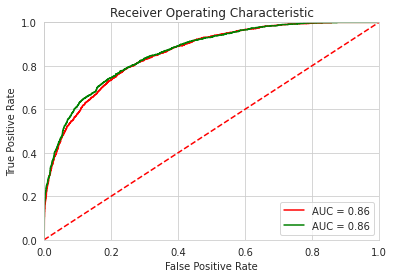

In [137]:

from sklearn.metrics import classification_report

y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_true, y_pred))
print(metrics.accuracy_score(y_test,clf.predict(X_test)))




#ROC and AUC

for name,model in models:
    if name == 'NN':
        probabilities1 = model.predict_proba(X_test)
        #print(probabilitie1[:15,:])
    

probabilities2 = clf.predict_proba(X_test)
#print(probabilities2[:15,:])



def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])


scores = score_model(probabilities1, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])



def plot_auc(labels, probs1,probs2):
    from sklearn import metrics
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = metrics.roc_curve(labels,probs1[:,1])
    auc = metrics.auc(fpr, tpr)
    
    fpr2, tpr2, threshold = metrics.roc_curve(labels,probs2[:,1])
    auc2 = metrics.auc(fpr2, tpr2)
 
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % auc)
    plt.plot(fpr2, tpr2, color = 'green', label = 'AUC = %0.2f' % auc2)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test,probabilities1,probabilities2)  

## Prepare Test Data

In [138]:
#
test_df = pd.read_csv('./data/AW_test.csv')

In [139]:
test_df.head(10)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876
5,16375,NaN,Gabriella,NaN,Hernandez,NaN,5689 Almondtree Circle,NaN,Spring Valley,California,United States,91977,165-555-0161,8/23/1957,Partial College,Clerical,F,M,1,1,0,1,44467
6,16109,NaN,Adam,K,Turner,NaN,9800 American Beauty Dr.,NaN,N. Vancouver,British Columbia,Canada,V7L 4J4,222-555-0116,7/5/1964,Bachelors,Skilled Manual,M,S,1,2,2,4,77702
7,15606,NaN,Marco,C,Prasad,NaN,8523 Rose Drive,C,Cranbourne,Victoria,Australia,3977,1 (11) 500 555-0165,12/11/1964,Bachelors,Professional,M,M,1,3,4,4,99418
8,20888,NaN,Clayton,P,Raje,NaN,"4, place du Tertre",NaN,Tremblay-en-France,Seine Saint Denis,France,93290,1 (11) 500 555-0188,1/21/1966,Partial High School,Manual,M,S,1,1,4,4,13522
9,20716,NaN,Kristina,V,Arun,NaN,Waldstr 29,NaN,Hannover,Nordrhein-Westfalen,Germany,30601,1 (11) 500 555-0186,9/13/1973,Bachelors,Skilled Manual,F,M,1,1,1,1,46264


In [140]:
#Let us see how many duplicates we have
#Features['CustomerID'].value_counts()
print(test_df.shape)
print(test_df.CustomerID.unique().shape)

(500, 23)
(500,)


In [141]:
# Droping duplicates
test_df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)#keep= 'first' or 'last'
print(test_df.shape)
print(test_df.CustomerID.unique().shape)

(500, 23)
(500,)


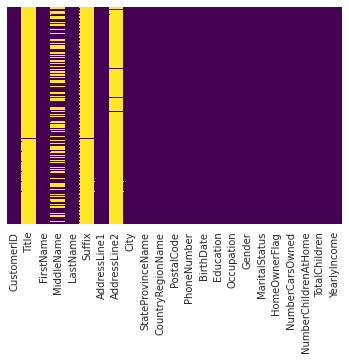

In [142]:
#Dealing with missing value
#(Features.astype(np.object) == 'NaN').any()
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [143]:
#dropping columns with missing values
test_df.drop(['Title','MiddleName','Suffix','AddressLine2'],axis=1,inplace=True)

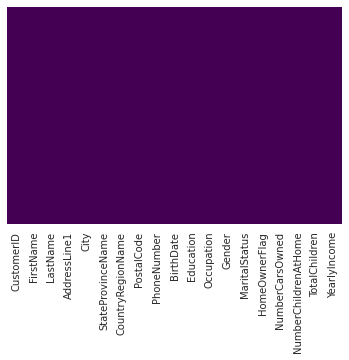

In [144]:
#double checking on the rest of data
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [145]:
#Creating a new column (Feature)
test_df['Age']=[(1998- int(x[-4:]))for x in test_df['BirthDate'] ]

In [146]:
test_df.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,53
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,64
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,33


In [147]:
#coding object feature to numerics

MaritalStatus2 = pd.get_dummies(test_df['MaritalStatus'],drop_first=False)
Gender2 = pd.get_dummies(test_df['Gender'],drop_first=False)
Occupation2 = pd.get_dummies(test_df['Occupation'],drop_first=False)
Education2 = pd.get_dummies(test_df['Education'],drop_first=False)

test_df['Gender2']=Gender2['M']
test_df['MaritalStatus2']=MaritalStatus2['M']



In [148]:
#Next, we  concatinete the rest of our data with the new created columns on Sex and Embarked
test_df = pd.concat([test_df,Occupation2,Education2],axis=1)
test_df.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age,Gender2,MaritalStatus2,Clerical,Management,Manual,Professional,Skilled Manual,Bachelors,Graduate Degree,High School,Partial College,Partial High School
0,18988,Courtney,Baker,8727 Buena Vista Ave.,Fremont,California,United States,94536,133-555-0128,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931,53,0,0,0,1,0,0,0,1,0,0,0,0
1,29135,Adam,Allen,3491 Cook Street,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,34,1,1,0,0,0,0,1,1,0,0,0,0
2,12156,Bonnie,Raji,359 Pleasant Hill Rd,Burbank,California,United States,91502,409-555-0193,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985,64,0,1,0,1,0,0,0,0,1,0,0,0
3,13749,Julio,Alonso,8945 Euclid Ave.,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,40,1,1,0,0,0,0,1,0,1,0,0,0
4,27780,Christy,Andersen,"42, boulevard Tremblay",Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876,33,0,1,0,0,1,0,0,0,0,1,0,0


In [149]:
#This variable will be used in next cells down
CustomerID=test_df['CustomerID']


In [150]:
#Feature selection
test_df.drop(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Occupation','Education','Gender', 'MaritalStatus'],axis=1,inplace=True)

In [151]:

#Data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_df)  
test_df = scaler.transform(test_df) 
test_df=np.asarray(test_df)



## Load and Test  the model on Test Data

In [152]:
from sklearn.externals import joblib


lebels=[]   #list to store Customers predicted labels
line=0
for line in range(test_df.shape[0]): #For every customer load the model and predict the lebel
        loaded_model = joblib.load('NN')
        predicted =loaded_model.predict(test_df[line:line+1,:])
        lebels.append(predicted)
        line+=line

from itertools import chain
mylebels=list(chain.from_iterable(lebels))# put all the lebels together
            
submission=pd.DataFrame({'ID':CustomerID, 'Label':mylebels})# forming a data frame of both id and labels
submission.sort_values(by='ID', ascending=False)
submission.to_csv('submission_format',index=False)# saving submission to csv file
submission.to_excel(pd.ExcelWriter('submission_format.xlsx'),'Sheet1',index=False)# saving submission to excel file

In [153]:
df1=pd.read_csv('submission_format')
print(df1)

loaded_model = joblib.load('NN')
predX =loaded_model.predict(test_df[6:7])#Predicting if customer number 6 will buy a bike
print(predX)#customer predicted as likely buying a bike (1)


        ID  Label
0    18988      0
1    29135      1
2    12156      0
3    13749      0
4    27780      0
..     ...    ...
495  24211      1
496  23627      1
497  14500      0
498  22223      0
499  29068      0

[500 rows x 2 columns]
[1]


## Conclusion


In this challenge, several data mining techniques including; Exploration data analysis, Data visualization,Data preparation were combined to building a number of Machine Learning Models. The models perfomences on training dataset were compared and Neural Network came up with top result 79%. Then after that I diceded to futher improve the NN model by applying the hyperparameter search with an intend to optimize the level of regularization,this stepped the final NN training perfomence to 80%.The NN model then deployed to new unseen dataset (test dataset) and the accuracy was 86%.